Text(value='rec31.jpg', description='Path to file', placeholder='Write here')

IntSlider(value=2, description='erode iterations', max=10, min=1)

IntSlider(value=5, description='dilate iterations', max=10, min=1)

IntSlider(value=10, description='thresh lvl', max=255, min=1)

FloatSlider(value=0.05, description='dist transform coeff', max=0.99, min=0.01, step=0.01)

Button(description='Run', style=ButtonStyle())

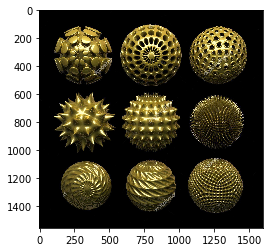

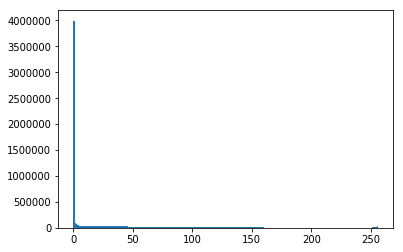

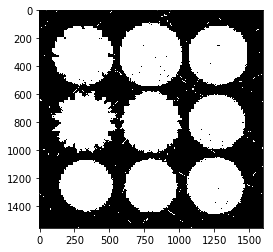

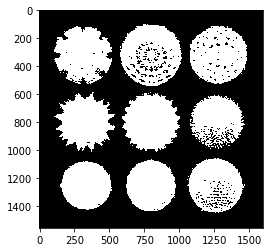

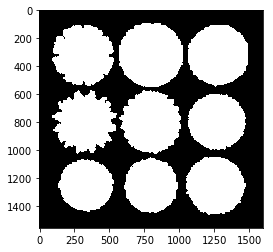

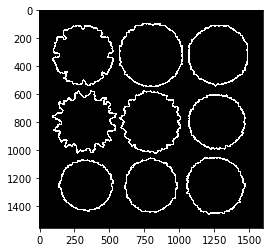

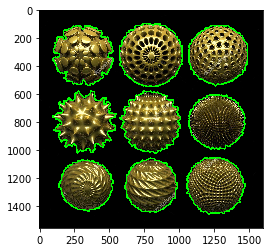

In [27]:
from __future__ import print_function
import cv2 as cv
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline


def disp_widg():
    clear_output()
    display(path_input)
    display(erode_slider)
    display(dilate_slider)
    display(thresh_slider)
    display(dist_transform_slider)
    display(run)


def onclick(b):
    disp_widg()
    erode_interations = erode_slider.value
    dilate_interations = dilate_slider.value
    thresh_lvl = thresh_slider.value
    dist_transform_coeff = dist_transform_slider.value
    img = cv.cvtColor(cv.imread(path_input.value), cv.COLOR_RGB2BGR)
    plt.imshow(img)
    plt.show(block=False)
    img_cvt = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.hist(img.ravel(), 256, [0, 256])
    plt.show(block=False)
    ret, thresh = cv.threshold(img_cvt, 0, thresh_lvl, cv.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.show(block=False)
    noiseless = cv.erode(thresh, cv.getStructuringElement(cv.MORPH_ELLIPSE,
                                                          (5, 5)),
                         iterations=erode_interations)
    plt.imshow(noiseless, cmap='gray')
    plt.show(block=False)
    invert = cv.dilate(noiseless, cv.getStructuringElement(cv.MORPH_ELLIPSE,
                                                           (5, 5)),
                       iterations=dilate_interations)
    plt.imshow(invert, cmap='gray')
    plt.show(block=False)
    dist_transform = cv.distanceTransform(invert, cv.DIST_L2, 5)
    ret, sure_fg = cv.threshold(dist_transform,
                                dist_transform_coeff*dist_transform.max(),
                                255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(invert, sure_fg)
    plt.imshow(unknown, cmap='gray')
    plt.show(block=False)
    new_im = img
    trans_image = cv.cvtColor(unknown, cv.COLOR_GRAY2RGB)
    for i in range(trans_image.__len__()):
        for j in range(trans_image[i].__len__()):
            if (trans_image[i][j][0] != 0):
                new_im[i][j][0] = 0
                new_im[i][j][1] = 255
                new_im[i][j][2] = 0
    plt.imshow(new_im)
    plt.show()

erode_slider = widgets.IntSlider(value=2, min=1, max=10, step=1,
                                 description="erode iterations")
dilate_slider = widgets.IntSlider(value=5, min=1, max=10, step=1,
                                  description="dilate iterations")
thresh_slider = widgets.IntSlider(value=10, min=1, max=255, step=1,
                                  description="thresh lvl")
dist_transform_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.99,
                                            step=0.01,
                                            description="dist transform coeff")
path_input = widgets.Text(value=r"rec31.jpg", description="Path to file",
                          placeholder="Write here")
run = widgets.Button(description="Run")
run.on_click(onclick)
disp_widg()
